In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [2]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [2]:
# import data_analysis_function

In [3]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [4]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [3]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal

from dataset_analysis import check_A_B_blast_furnace
from dataset_analysis import no_zero_value_in_target

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [96]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [176]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
# print(type(correlation_threshold_min_value))
print(correlation_threshold_max_value)
print(correlation_threshold_min_value)

0.9
0.3


In [177]:
print(correlation_threshold_max_value)
print(correlation_threshold_min_value)

0.9
0.3


In [6]:
initial_dataframe = create_dataframe(filepath_server)

In [7]:
initial_dataframe.head()

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1565853000000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.096640,0.671974,33.111827
1,1565852940000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.902377,50.110508,40.379436,73.763059,71.276868,49.615189,38.034993,0.672205,33.060837
2,1565852880000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.944404,50.107863,40.662733,73.763059,71.434676,49.749139,37.951489,0.682817,33.066594
3,1565852820000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.943151,50.062481,40.229931,73.763059,71.210012,49.954175,37.911700,0.665143,34.003952
4,1565852760000,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.966247,50.058978,39.999024,73.763059,71.112367,49.849248,37.978844,0.664477,33.928494


In [6]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


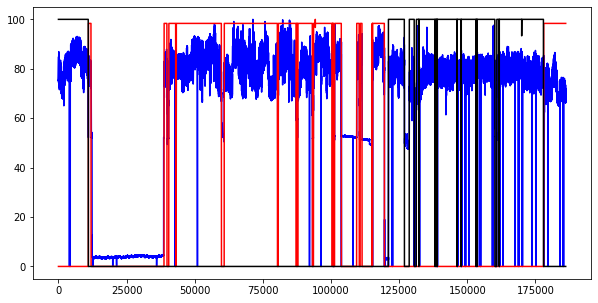

In [9]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [10]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


In [11]:
test_new.shape

(186100, 4239)

In [141]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
# multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])
multivariate_data = alter_time(test_new_2, start_pos, 100000)

In [142]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [17]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (50000, 3983)
<class 'pandas.core.frame.DataFrame'> (50000, 3983)


In [18]:
rearranged_dataframe.head()

,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,AEWIHO_T9AV2
49999,2019-07-11 15:33:00,99.757202,95.011663,89.416520,61.822376,90.691467,93.474090,100.000000,73.344792,84.900123,...,95.945986,66.908084,0.0,71.661437,66.775932,75.149535,15.674690,0,90.562429,92.297021
49998,2019-07-11 15:34:00,99.550348,94.267240,99.787635,61.822376,90.489699,94.919421,61.586370,75.377468,50.231601,...,95.760888,65.147304,0.0,63.167871,67.625041,75.642748,15.924686,0,91.838458,92.911851
49997,2019-07-11 15:35:00,62.756308,94.629232,99.699262,61.822376,90.489699,95.983762,15.516629,76.364536,61.074544,...,95.712684,64.624043,0.0,63.120734,67.217862,75.188296,15.925562,0,91.772436,92.906907
49996,2019-07-11 15:36:00,28.947478,94.649671,95.196596,61.822376,90.812069,96.144775,17.823156,76.887340,100.000000,...,95.841262,63.934347,0.0,65.206246,67.217862,75.188296,15.835715,0,92.844796,88.025347
49995,2019-07-11 15:37:00,26.522307,94.468675,87.380300,60.899654,90.651264,96.004174,37.850672,77.351916,65.192627,...,95.833102,65.206262,0.0,63.938958,67.217862,75.188296,15.888221,0,94.188047,83.852231


In [ ]:
rearranged_dataframe.dtypes

In [143]:
def check_A_B_blast_furnace_1(dataframe,furnace_signal_column_a,value_A, furnace_signal_column_b,value_B):
    req_data=dataframe.loc[(dataframe[furnace_signal_column_a]>=value_A) | (dataframe[furnace_signal_column_b]>=value_B)]
    req_frame=pd.DataFrame(req_data,columns=dataframe.columns)
    
    return req_frame

dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
dataframe_no_zero_value_blast_furnace.dtypes

In [22]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [23]:
# no_zero_furnace_1.dtypes

In [25]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [29]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [144]:
def no_zero_value_in_target_1(dataframe, target_column, req_drop_value_target):
    req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
    req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
    return req_frame_1

dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

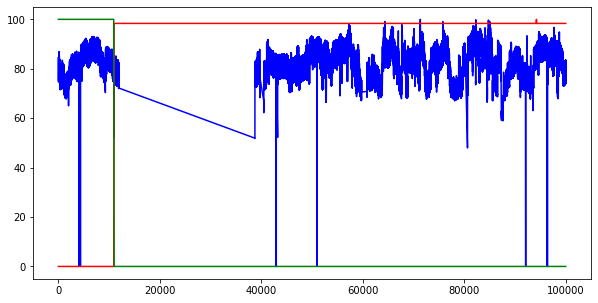

In [145]:
plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [146]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(100000, 3983)
(70312, 3983)
(70300, 3983)


In [147]:
dataframe_no_zero_value_target_column_1 = dataframe_no_zero_value_target_column.reset_index()
dataframe_no_zero_value_target_column_2 = dataframe_no_zero_value_target_column_1.drop(['index'], axis=1)
dataframe_no_zero_value_target_column_2.shape

(70300, 3983)

In [ ]:
dataframe_no_zero_value_target_column_2.head()

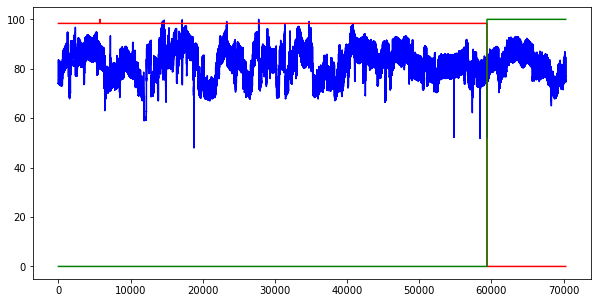

In [149]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [32]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

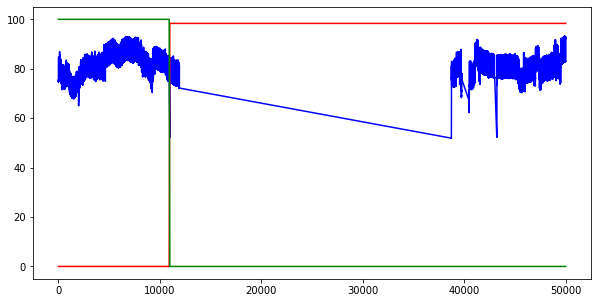

In [33]:
plt.plot(dataframe_no_zero_value_target_column[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [39]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [40]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [152]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [153]:
nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [36]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [ ]:
print(type(dataframe_drop_column_with_same_value))
print(dataframe_drop_column_with_same_value.shape)
dataframe_drop_column_with_same_value.head()

In [ ]:
dataframe_drop_column_with_same_value.dtypes

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [155]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [ ]:
dataframe_no_string.dtypes

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [42]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [157]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')

In [158]:
dataframe_datetime = dataframe_datetime.drop([furnace_signal_column_a, furnace_signal_column_b], axis = 1)

In [159]:
dataframe_datetime.shape

(70300, 2645)

In [160]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [ ]:
sklearn_feature_best_dataframe.head()

In [162]:
# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [118]:
# main_correlation

In [ ]:
# q

In [178]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [179]:
dataframe_high_correlation.shape

(70300, 38)

In [115]:
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [79]:
# dataframe_datetime.tail()

In [180]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder  has already created


In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [181]:
def make_dataset(dataframe):
    dataset = np.array(dataframe)
    NumberOfElements = int(len(dataset) * 0.99)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    print('test_input shape: ', test_input.shape)
    test_output = dataset[NumberOfElements:len(dataset), -1]
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

In [182]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

Number of Elements for training:  69597
dataset length:  70300
train_input shape:  (69597, 37)
train_output shape:  (69597,)
test_input shape:  (703, 37)
test_output shape:  (703,)


In [183]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

In [ ]:
dataframe_high_correlation.tail()

In [ ]:
def draw_graph(dictionary_value, dictionary, target):
    for i in dictionary_value:
        value = dictionary[i]
        print(value)
        value.iloc[:].plot(y=[target])

        plt.title('visualization of signal ' + str(target) + ' in time of ' + str(i))
        plt.xlabel('range')
        plt.ylabel('value')

        plt.rcParams['figure.figsize'] = (20, 10)
#         plt.savefig(fig_location + '/' + str(i) + '.jpg')
        plt.ioff()
        
draw_graph_date_1 = draw_graph(date_key_value,dict_of_dates, target_column)

In [208]:
dataframe_datetime.head(3)

,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,AEAGHOAWE_A1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-06-06 22:07:00,31.714760,98.290777,12.774177,75.836062,97.54164,94.738754,17.486549,58.013781,100.0,14.589346,...,65.885359,95.197365,58.983086,0.0,51.244399,67.760766,67.870296,34.707141,84.001424,74.107030
2019-06-06 22:08:00,31.416774,98.431634,10.470402,72.318339,97.54164,94.437896,16.515412,58.013781,100.0,13.862606,...,65.765967,95.164983,58.983086,0.0,51.333354,67.760766,67.870296,35.122631,84.026633,74.243590
2019-06-06 22:09:00,25.816008,98.592181,7.598298,69.377008,97.54164,93.634346,12.771425,58.013781,100.0,13.353880,...,65.738397,95.164983,58.983086,0.0,51.256246,67.760766,67.870296,35.461423,83.908993,74.069337


In [211]:
dataframe_datetime.tail(3)

,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,AEAGHOAWE_A1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-08-15 09:08:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,99.209885,...,72.024943,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,4.821300,75.169542
2019-08-15 09:09:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,99.209885,...,72.130168,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,4.821300,74.837410
2019-08-15 09:10:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,99.209885,...,71.655817,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,4.826622,74.720623


In [198]:
dict_of_dates

{'2019-06-06':                         dateTime_column  day_name TypeofDAY  TypeofDAY_number  \
 dateTime                                                                        
 2019-06-06 22:07:00 2019-06-06 22:07:00  Thursday   Weekday                 1   
 2019-06-06 22:08:00 2019-06-06 22:08:00  Thursday   Weekday                 1   
 2019-06-06 22:09:00 2019-06-06 22:09:00  Thursday   Weekday                 1   
 2019-06-06 22:10:00 2019-06-06 22:10:00  Thursday   Weekday                 1   
 2019-06-06 22:11:00 2019-06-06 22:11:00  Thursday   Weekday                 1   
 ...                                 ...       ...       ...               ...   
 2019-06-06 23:55:00 2019-06-06 23:55:00  Thursday   Weekday                 1   
 2019-06-06 23:56:00 2019-06-06 23:56:00  Thursday   Weekday                 1   
 2019-06-06 23:57:00 2019-06-06 23:57:00  Thursday   Weekday                 1   
 2019-06-06 23:58:00 2019-06-06 23:58:00  Thursday   Weekday                 1   
 2

In [214]:
rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
print(type(rowData))
print(rowData.shape)
rowData.head(3)

<class 'pandas.core.frame.DataFrame'>
(67, 2645)


,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,AEAGHOAWE_A1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-08-17 02:00:00,26.373331,97.546345,1.092565,63.725645,97.018270,94.236817,100.000000,60.568950,100.000000,33.103102,...,76.052248,98.418709,86.849705,0.000000,59.574683,67.524068,75.751684,34.795762,87.953953,88.425450
2019-08-17 18:40:00,37.094778,96.359661,2.496899,63.264284,96.856705,95.381291,100.000000,63.240574,100.000000,31.899441,...,76.054354,98.394656,86.848475,0.000000,60.412942,67.729009,75.751684,34.701794,88.391700,86.730807
2019-08-18 11:20:00,73.756414,96.982918,16.098781,63.264284,96.675418,96.726835,77.933412,65.679287,74.861111,28.449709,...,73.402687,98.734371,89.445129,67.409332,63.052686,67.558825,75.751684,33.071210,90.089870,80.863665


In [215]:
rowData.tail(3)

,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,AEAGHOAWE_A1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-09-30 12:40:00,30.147617,91.873414,25.741487,78.142867,97.823816,97.107825,21.029115,64.924506,20.175418,14.916380,...,72.776951,97.896934,81.569810,50.422940,63.059921,67.388344,76.733433,34.503689,90.320348,83.422159
2019-10-01 05:20:00,32.183769,92.195267,23.321852,78.604228,97.985381,96.927157,21.109139,64.459930,20.175418,14.970886,...,73.724672,97.896934,82.406290,51.539074,63.206904,67.590284,76.621158,34.827054,88.664591,86.789818
2019-10-01 22:00:00,30.696685,93.019968,19.674464,79.065594,98.146186,96.586234,17.955592,63.995354,21.147657,13.051831,...,72.969863,97.822151,81.639823,55.077054,63.120734,67.590284,76.621158,35.220892,88.695002,89.726478


In [ ]:
df = dataframe_date_time_type(dataframe_datetime)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = 'date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = 'week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = 'day_fig_target')

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [124]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 168,193
Trainable params: 168,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [126]:
predicted_output = NN_model.predict(test_input)

In [127]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.25
Mean_absolute_error: 1.83
Mean squared error: 6.92
RMSE:  2.6296533440458822


In [ ]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [72]:
dataframe_datetime.tail()

,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,AEAGHOAWE_A1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-08-15 09:06:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,99.209885,...,72.001797,95.629849,63.149452,42.009703,57.167141,70.572657,72.358673,25.090725,4.817258,75.514649
2019-08-15 09:07:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,99.209885,...,71.580756,95.592478,62.868783,42.389817,57.236065,70.572657,72.472953,24.828106,4.822540,75.608264
2019-08-15 09:08:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,99.209885,...,72.024943,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,4.821300,75.169542
2019-08-15 09:09:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,99.209885,...,72.130168,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,4.821300,74.837410
2019-08-15 09:10:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,99.209885,...,71.655817,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,4.826622,74.720623


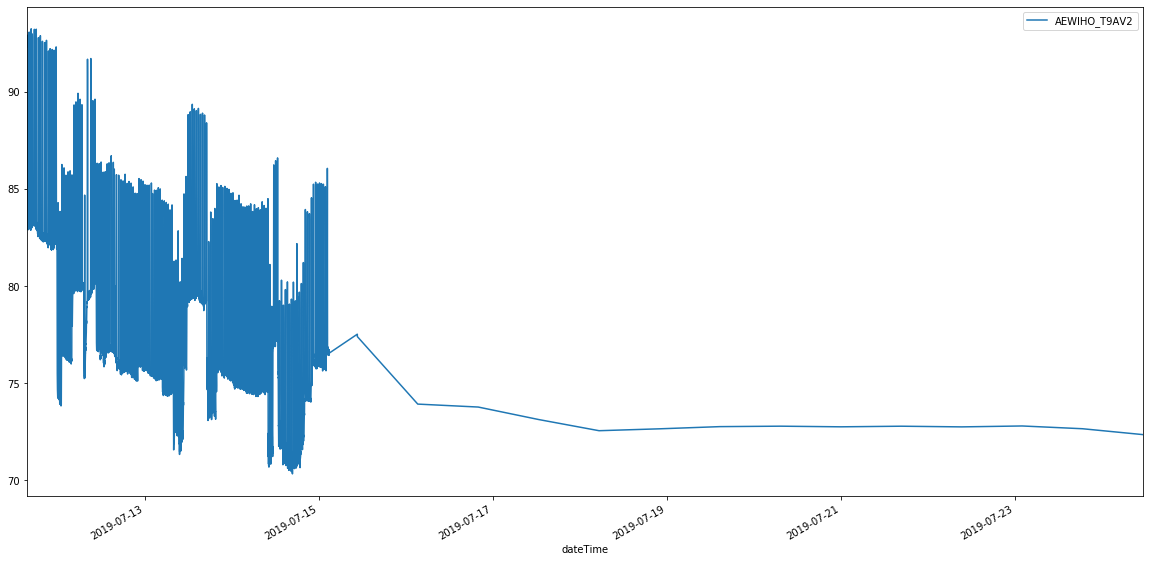

In [70]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)